In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

## ERRORES COMUNES

In [2]:
df = pd.DataFrame()
df['Algoritmo'] = ['A']*1000 + ['B']*1000
df['Velocidad'] = [random.normalvariate(x,15) for x in [1000]*1000] + [random.normalvariate(x,10) for x in [1050]*1000]

### Ocultando datos

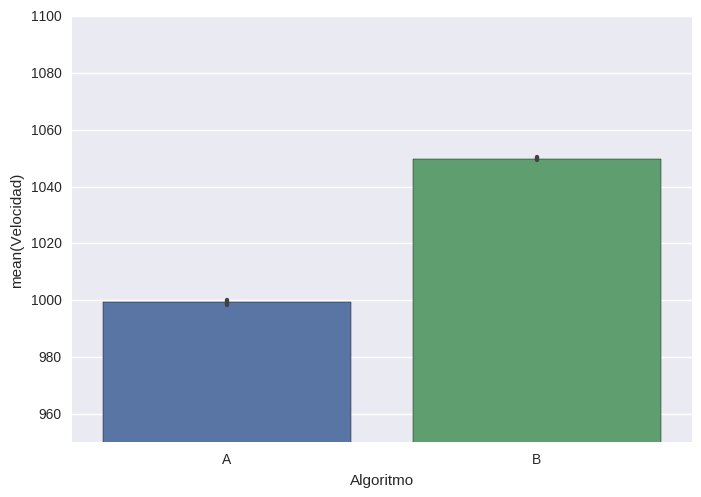

In [4]:
sns.barplot(x='Algoritmo', y='Velocidad', data=df)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,950,1100))
sns.plt.show()

### Mostrando todos los datos

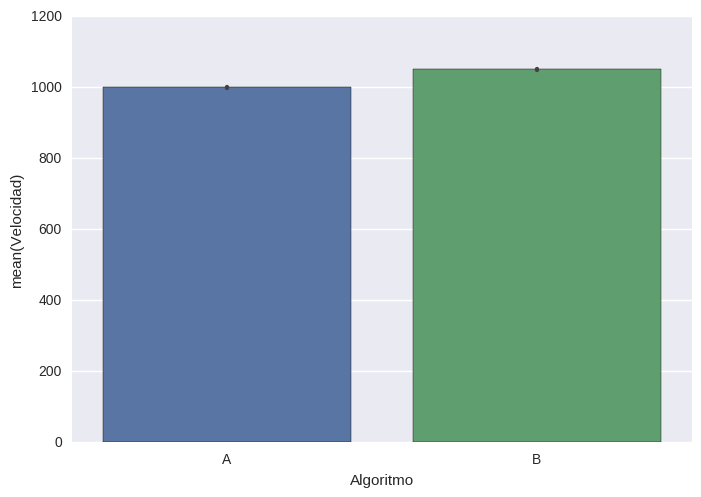

In [5]:
sns.barplot(x='Algoritmo', y='Velocidad', data=df)
sns.plt.show()

### Mostrando datos con escalas muy distintas en un mismo gráfico

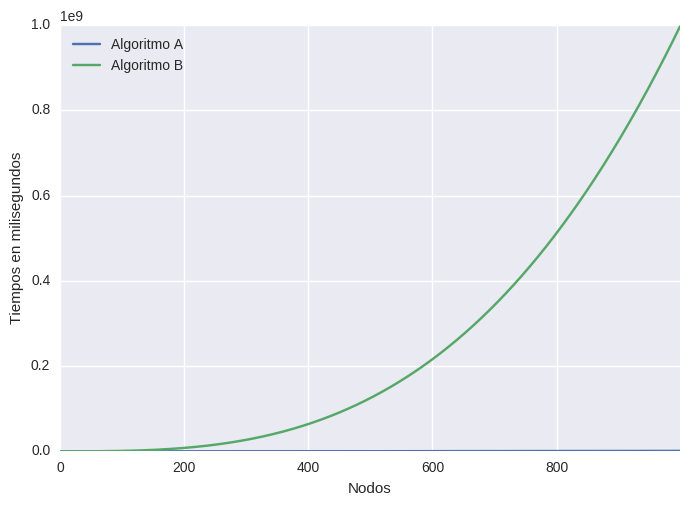

In [7]:
plt.clf()
df2 = pd.DataFrame()
df2['Nodos'] = [x for x in range(1000)]
df2['Algoritmo A'] = [x**2 for x in range(1000)]
df2['Algoritmo B'] = [x*(x-1)*(x-2) for x in range(1000)]
df2.plot(x='Nodos')
plt.ylabel('Tiempos en milisegundos')
plt.show()

### Curva real del dato Algoritmo A
Al sacar los datos de 'Algoritmo B' vemos que en realidad 'Algoritmo A' no era constantemente cero. 'Algoritmo A' era en realidad una cuadrática.

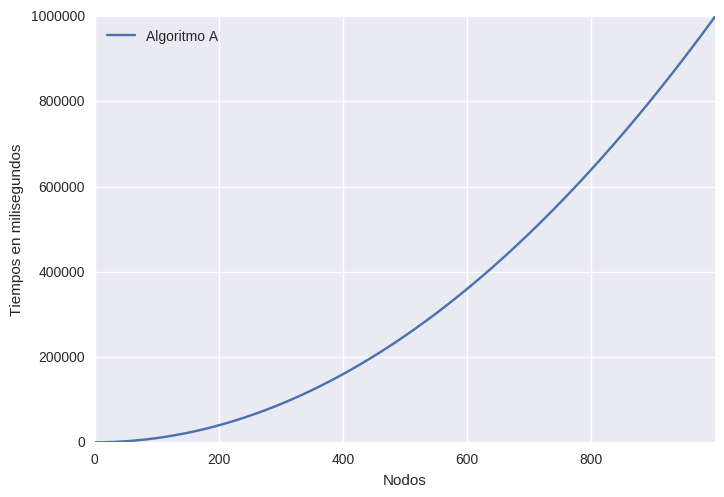

In [6]:
plt.clf()
df2[['Algoritmo A','Nodos']].plot(x='Nodos')
plt.ylabel('Tiempos en milisegundos')
plt.show()

### Mostrando datos en escala logarítmica
Cuando queremos comparar datos que difieren mucho el uno del otro, o datos donde importan más los valores pequeños que los grandes, utilizar escala logarítmica es una buena solución.

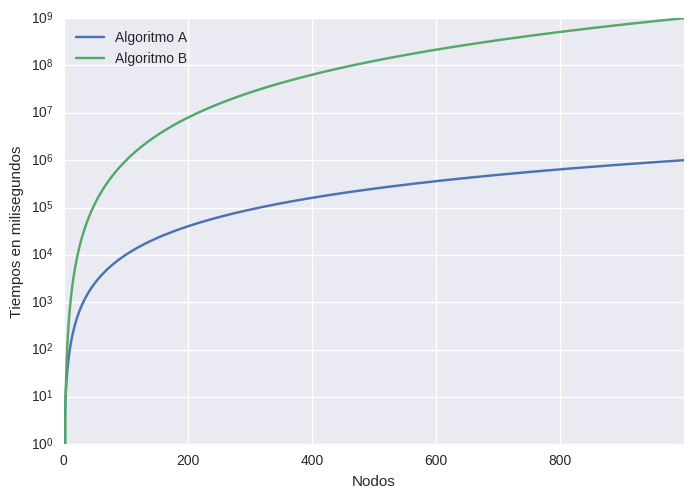

In [7]:
plt.clf()
df2.plot(x='Nodos', logy=True)
plt.ylabel('Tiempos en milisegundos')
plt.show()

## Problemas con las escalas
### Mostrando diferentes escalas incorrectamente

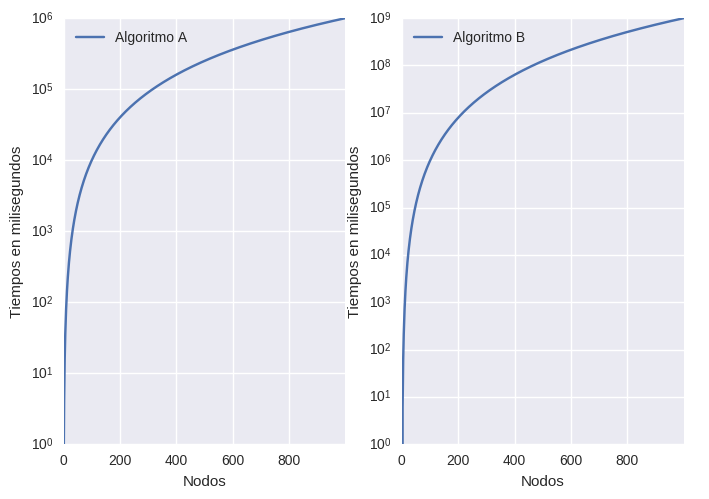

In [8]:
plt.clf()
axis1 = plt.subplot(1,2,1)
plt.ylabel('Tiempos en milisegundos')
axis2 = plt.subplot(1,2,2)
plt.ylabel('Tiempos en milisegundos')

df2[['Algoritmo A','Nodos']].plot(x='Nodos', ax=axis1, logy=True)
df2[['Algoritmo B','Nodos']].plot(x='Nodos', ax=axis2, logy=True)

plt.show()

### Mostrando diferentes escalas correctamente

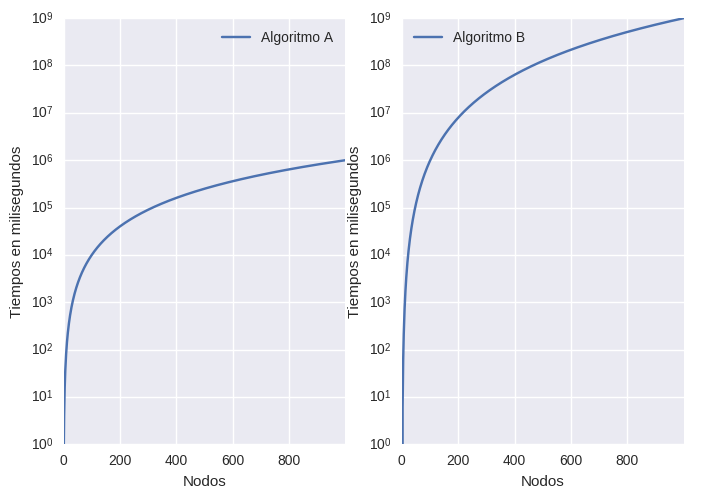

In [9]:
plt.clf()
axis1 = plt.subplot(1,2,1)
plt.ylabel('Tiempos en milisegundos')
axis2 = plt.subplot(1,2,2)
plt.ylabel('Tiempos en milisegundos')
df2[['Algoritmo A','Nodos']].plot(x='Nodos', ax=axis1, logy=True)
df2[['Algoritmo B','Nodos']].plot(x='Nodos', ax=axis2, logy=True)
x1,x2,y1,y2 = axis1.axis()
axis1.set_xlim(x1,x2)
axis1.set_ylim(y1,1000000000) # obligo al primer gráfico a tener la misma escala que el segundo gráfico para poder co 
plt.show()

## Gráficos poco informativos

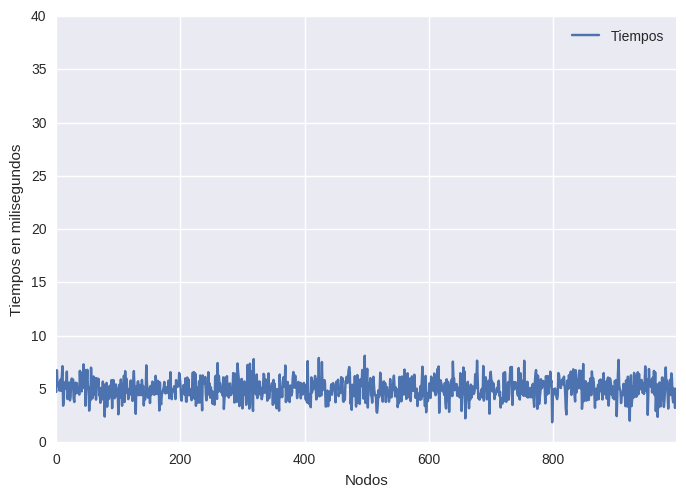

In [10]:
df3 = pd.DataFrame()
df3['Nodos'] = range(1000) 
df3['Tiempos'] = [random.normalvariate(5,1) for x in range(1000)]
plt.clf()
df3.plot(x='Nodos', y='Tiempos')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,40))
plt.ylabel('Tiempos en milisegundos')
plt.show()

## Una mejor forma de plotear datos con esta caracteristica
Cuando los datos no presentan una curva interesante para mostrar, no hace falta graficar la misma solo para mostrar que la variable presenta una forma constante. Sin embargo, ahora la pregunta cambia un poco, dado que los datos no son estrictamente constantes y presentan variaciones, la pregunta ahora cambia un poco. ¿cuanta varianza tienen estos datos? ¿cual es el valor representativo, para esta constante? para esto: 

### Damos una mirada a la distribución de los datos. 

In [11]:
df3['Tiempos'].describe()

count    1000.000000
mean        5.026016
std         0.987581
min         1.885913
25%         4.402981
50%         5.015909
75%         5.694215
max         8.123584
Name: Tiempos, dtype: float64

### Usamos gráficos más adecuados para mostrar la distribución de estos datos.

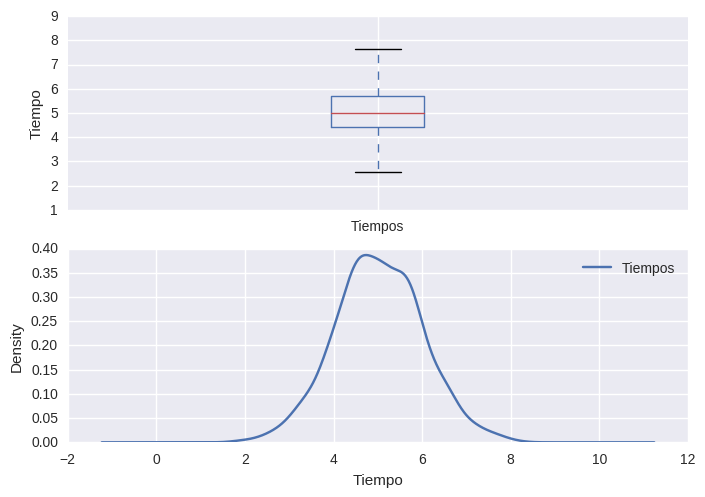

In [14]:
plt.clf()
axis1 = plt.subplot(2,1,1)
axis2 = plt.subplot(2,1,2)

df3.plot(x='Nodos', y='Tiempos', kind='box', ax=axis1)
df3.plot(x='Nodos', y='Tiempos', kind='density', ax=axis2)

axis1.set_ylabel('Tiempo')

axis2.set_xlabel('Tiempo')

plt.show()